<a href="https://colab.research.google.com/github/Ahtesham519/Genrative_Deep_learning_v2_2023/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoders on Fashion MNIST

In [5]:
!pip show jupyter

In [2]:
!pip install notebooks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement notebooks (from versions: none)
ERROR: No matching distribution found for notebooks


In [21]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models , datasets, callbacks 
import tensorflow.keras.backend as K
from keras.layers import Dense

from notebooks.utils import display 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: ignored

0 . Parameters

In [29]:
from IPython.terminal.embed import EmbeddedMagics
IMAGE_SIZE = 32
CHANNELS = 1
BATCH_SIZE = 100
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 3


1. Prepare the data

In [30]:
#Load the data
(x_train, y_train) , (x_test , y_test) = datasets.fashion_mnist.load_data()

In [31]:
#PreProcess the data

def preprocess(imgs):
  """
  Normalize and reshape the images
  """

  imgs = imgs.astype("float32") / 255.0
  imgs = np.pad(imgs, ((0,0) , (2,2) , (2,2)) , constant_values = 0.0)
  imgs = np.expand_dims(imgs, -1)
  return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [32]:
#Show some items of clothings from the traingin set 
display(x_train)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Build The AutoEncoder

In [33]:
#Encoder
encoder_input = layers.Input(
    shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS), name= "encoder_input"
)
x = layers.Conv2D(32, (3,3), strides = 2  ,activation = "relu" , padding ="same")(
    encoder_input
)
x = layers.Conv2D(64, (3,3) , strides = 2, activation = "relu" , padding ="same")(x)
x = layers.Conv2D(128, (3,3) , strides =2 , activation = "relu" , padding = "same")(x)
shape_before_flattening = K.int_shape(x)[1:] #the decoder will need this!

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name = "encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
Total params: 96,770
Trainable params: 96,770
Non-trainable

In [34]:
#Decodder
decoder_input = layers.Input(shape= (EMBEDDING_DIM,), name = "decoder_input")
x= layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x= layers.Reshape(shape_before_flattening)(x)
x= layers.Conv2DTranspose(
    128 , (3,3) , strides = 2,activation = "relu" , padding = "same"
)(x)
x = layers.Conv2DTranspose(
    64,   (3,3) , strides = 2, activation = "relu" , padding = "same"
)(x)
x = layers.Conv2DTranspose(
    32 , (3,3) , strides =2 , activation = "relu" , padding = "same"
)(x)
decoder_output = layers.Conv2D(
    CHANNELS,
    (3,3),
    strides = 1,
    activation = "sigmoid",
    padding = "same",
    name = "decoder_output"
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 2048)              6144      
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 8, 8, 128)        147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 16, 16, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 32, 32, 32)       1846

In [35]:
from keras.layers import Dense

In [37]:
#AutoEncoder
autoencoder = models.Model(
    encoder_input , decoder(encoder_output)
) #decoder(encoder_output)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
 model_6 (Functional)        (None, 32, 32, 1)         2462

Train the AutoEncoder

In [39]:
#compile the autoencoder
autoencoder.compile(optimizer = "adam" , loss="binary_crossentropy")

In [40]:
#create a model to save a checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath = "./checkpoint",
    save_weights_only = False,
    save_freq = "epoch",
    monitor = "loss",
    mode = "min",
    save_best_only = True,
    verbose = 0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir = "./logs")

In [41]:
autoencoder.fit(
    x_train,
    x_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    shuffle = True,
    validation_data = (x_test, x_test),
    callbacks = [model_checkpoint_callback, tensorboard_callback],
    
)

Epoch 1/3
600/600 [==============================] - ETA: 0s - loss: 0.3001

600/600 [==============================] - 300s 496ms/step - loss: 0.3001 - val_loss: 0.2645
Epoch 2/3
600/600 [==============================] - ETA: 0s - loss: 0.2595

600/600 [==============================] - 303s 505ms/step - loss: 0.2595 - val_loss: 0.2575
Epoch 3/3
600/600 [==============================] - ETA: 0s - loss: 0.2546

600/600 [==============================] - 301s 502ms/step - loss: 0.2546 - val_loss: 0.2545


In [42]:
#save the final models 
autoencoder.save("./models/autoencoder")
encoder.save("./models/encoder")
decoder.save("./models/decoder")


4. Reconstruct using the autoencoder

In [43]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

In [44]:
predictions = autoencoder.predict(example_images)

print("Example real clothing items")
display(example_images)
print("reconstructions")
display(predictions)

157/157 [==============================] - 8s 52ms/step
Example real clothing items


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

reconstructions


array([[[[6.64285035e-05],
         [1.12234684e-05],
         [1.15413795e-05],
         ...,
         [1.10863039e-06],
         [5.89415833e-07],
         [1.19595279e-04]],

        [[1.89023353e-06],
         [2.97960639e-07],
         [8.18739409e-07],
         ...,
         [1.04289441e-07],
         [2.41283367e-08],
         [6.87048214e-06]],

        [[3.36574112e-06],
         [9.03220382e-07],
         [1.36019726e-05],
         ...,
         [2.41418329e-05],
         [1.37057566e-06],
         [2.87679304e-05]],

        ...,

        [[8.59654904e-07],
         [5.91416949e-07],
         [3.82226972e-05],
         ...,
         [1.03736966e-05],
         [1.09686653e-06],
         [3.40013648e-05]],

        [[1.70809949e-06],
         [4.46073443e-07],
         [1.67474209e-05],
         ...,
         [1.35890105e-06],
         [4.79146934e-07],
         [3.09291572e-05]],

        [[1.48536506e-04],
         [2.14963020e-05],
         [1.76723232e-04],
         ...,
 

### 5.Embed using the encoder

In [45]:
#Encode the example images
embeddings = encoder.predict(example_images)


157/157 [==============================] - 1s 8ms/step


In [48]:
#some examples of the embeddings
print(embeddings[:5])

[[ 2.4132905   2.1344228 ]
 [-7.1513133  -2.4861665 ]
 [-6.972142    9.889229  ]
 [-4.384192    8.159567  ]
 [-3.4092643  -0.71381086]]


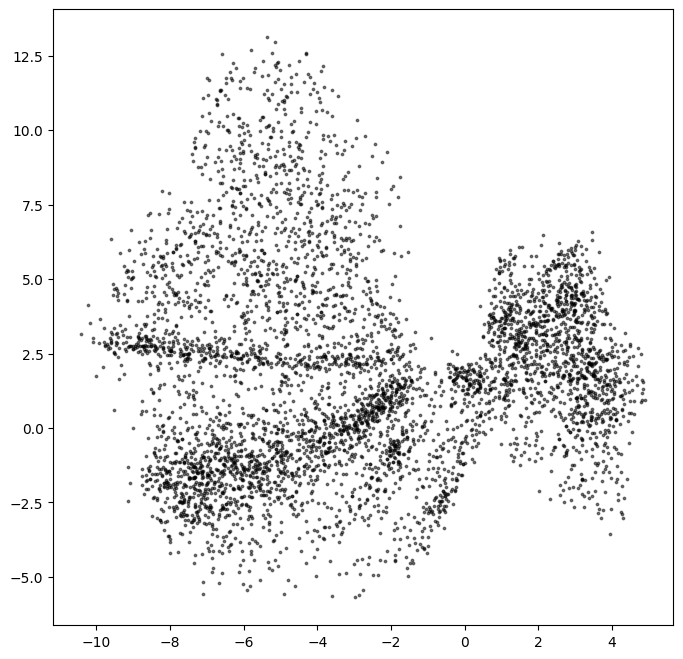

In [49]:
#show the encoded points in 20 space
figsize = 8

plt.figure(figsize = (figsize, figsize))
plt.scatter(embeddings[:,0] , embeddings[:,1] , c="black" , alpha= 0.5, s=3)
plt.show()

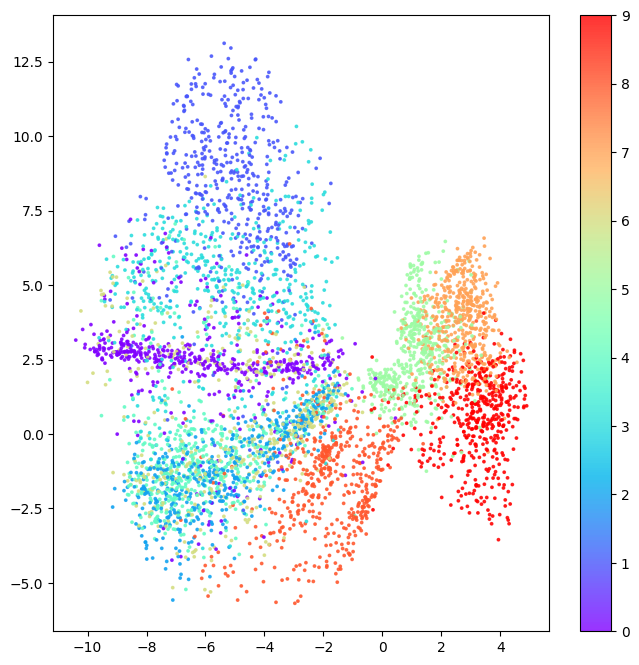

In [51]:
#color the embeddings by their label(clothing type - see table)

example_labels = y_test[: n_to_predict]

figsize = 8 
plt.figure(figsize =(figsize, figsize))
plt.scatter(
    embeddings[:,0],
    embeddings[:, 1],
    cmap="rainbow",
    c= example_labels,
    alpha = 0.8,
    s= 3,
)
plt.colorbar()
plt.show()


### 6. Genrate using the decoder

In [52]:
#det the range of the existing embeddings
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis = 0)

#sample some points in the latent space
grid_width , grid_height = (6,3)
sample = np.random.uniform(
    mins, maxs, size = (grid_width * grid_height , EMBEDDING_DIM)
)

In [53]:
#Decode the samples points
reconstructions = decoder.predict(sample)

1/1 [==============================] - 0s 247ms/step


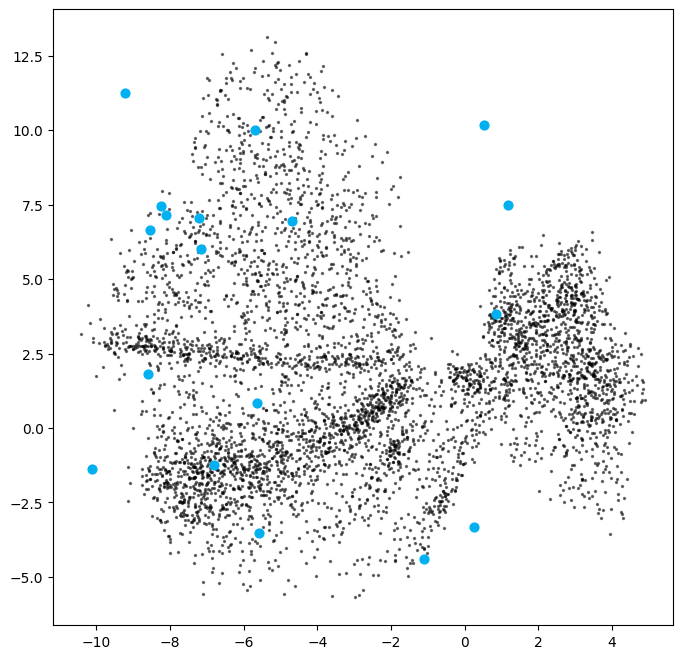

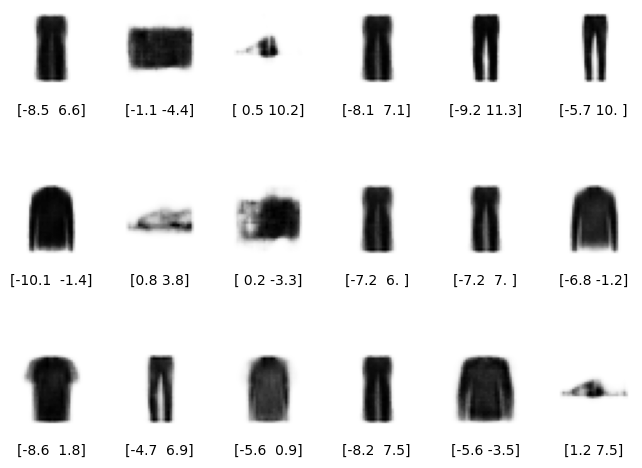

In [54]:
#Draw a plot of ....
figsize = 8
plt.figure(figsize= ( figsize, figsize))

#.... the orignal embeddings...
plt.scatter(embeddings[:, 0] , embeddings[:, 1] , c = "black" , alpha = 0.5 , s=2)

#... and the newly genrated points in the latent space 
plt.scatter(sample[:,0], sample[:, 1] , c="#00B0F0" , alpha= 1 , s= 40)
plt.show()

#Add underneath a grid of the decoder images 
fig = plt.figure(figsize=(figsize , grid_height *2 ) )
fig.subplots_adjust(hspace = 0.4 , wspace = 0.4)

for i in range(grid_height * grid_width):
  ax = fig.add_subplot(grid_height, grid_width, i +1)
  ax.axis("off")
  ax.text(
      0.5,
      -0.35,
      str(np.round(sample[i , :], 1)),
      fontsize = 10 , 
      ha = "center",
      transform = ax.transAxes,
  )

  ax.imshow(reconstructions[i , :, :] , cmap= "Greys")


8/8 [==============================] - 1s 84ms/step


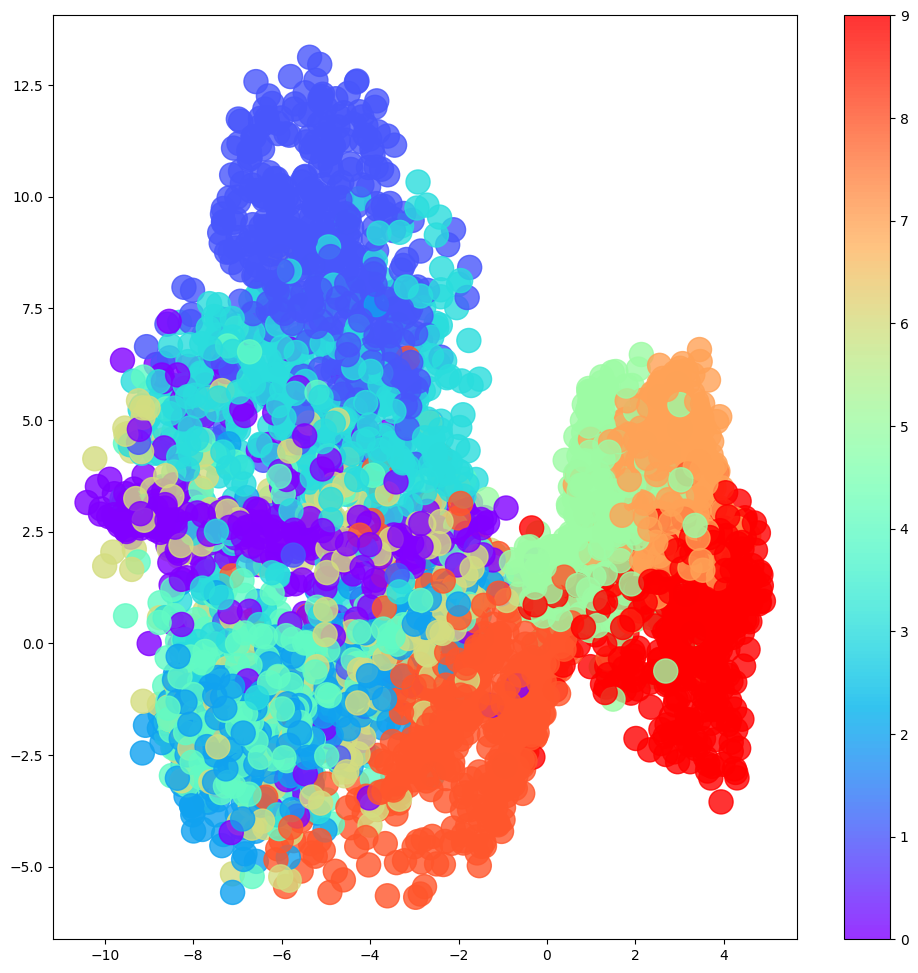

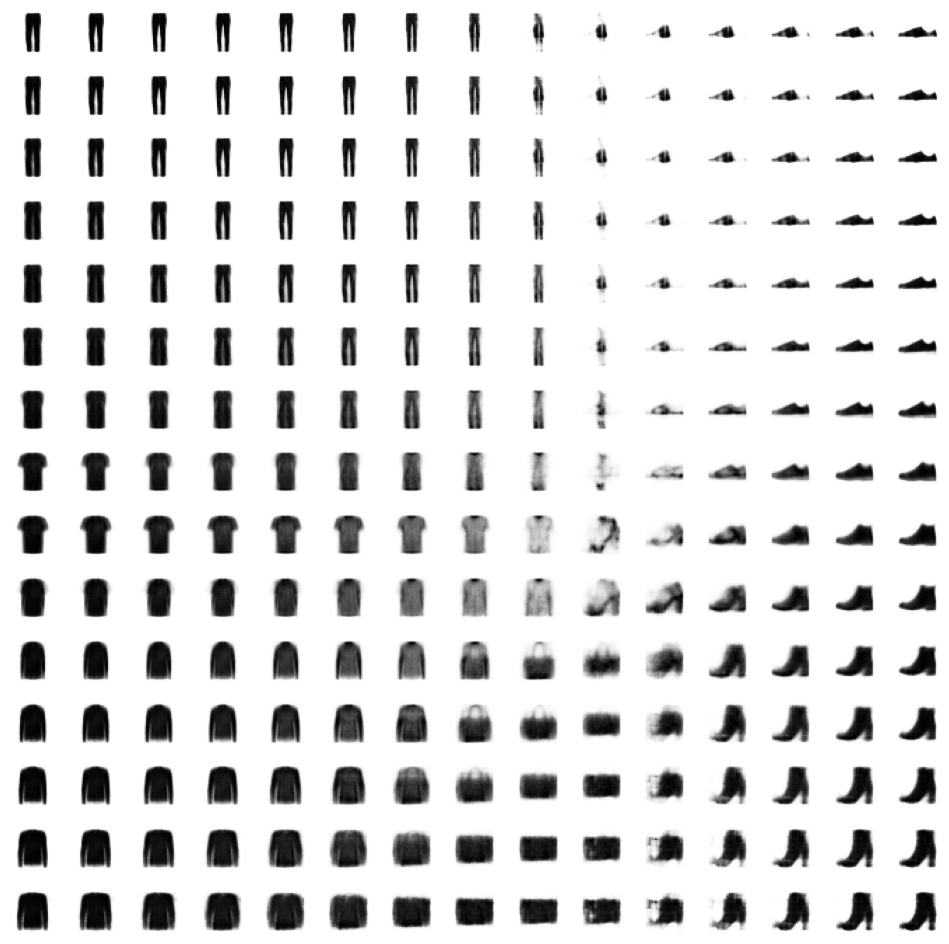

In [56]:
#color the embedings by their Label (Clothing type - see table)

figsize = 12
grid_size = 15
plt.figure(figsize = (figsize , figsize))
plt.scatter(
    embeddings[:, 0 ],
    embeddings[:, 1 ],
    cmap = "rainbow",
    c = example_labels,
    alpha = 0.8,
    s = 300,
)
plt.colorbar()

x= np.linspace(min(embeddings[:, 0]) , max(embeddings[:, 0]) , grid_size)

y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]) , grid_size)
xv, yv = np.meshgrid(x,y)

xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
plt.show()

fig = plt.figure(figsize = (figsize, figsize))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range (grid_size ** 2):
  ax = fig.add_subplot(grid_size, grid_size, i +1 )
  ax.axis("off")
  ax.imshow(reconstructions[i, :, : ] , cmap = "Greys")